<a href="https://colab.research.google.com/github/ep1lept1c/MSU_DL/blob/main/MSU_DL_07_language_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в глубокое обучение
## Занятие 7. Языковое моделирование и RNN


##### Автор: [Татьяна Гайнцева](https://www.linkedin.com/in/tgaintseva/), @atmyre

## План занятия

0. Повторение. Анализ текстовых данных.
1. Рекуррентная нейронная сеть.
2. Задача языкового моделирования.
3. Построение рекуррентной нейронной сети для задачи языкового моделирования.

## 0. Повторение. Анализ текстовых данных.

На прошлом занятии мы начали разговор про обработку текста. Мы узнали, как можно создавать и даже выучивать информативные векторные представления частей текста (слов, частей слов).

Мы также обсудили способ, как на основе векторных представлений частей текстов можно создавать векторные представления всего текста. Этот способ — просуммировать или усреднить векторы всех слов текста, чтобы получить один вектор всего текста. Но у этого способа есть явные недостатки:
- Он не учитывает разную важность слов в тексте;
- Он не учитывает порядок слов в тексте.

Ну и мы интуитивно понимаем, что смысл текста не равен среднему смыслов его слов. Это что-то сложнее.

Сейчас мы познакомимся с рекуррентными нейронными сетями (RNN), которые были придуманы для работы с данными, имеющими природу последовательности. Текст как раз имеет такую природу, поэтому RNN хорошо подходят для работы с текстами.


## 1. Рекуррентные нейронные сети.


(RNN, Recurrent Neural Networks)

В чем состоит идея RNN:

Сморите, одно из глвыных отличий текста и звука от других типов данных (например, изображений) состоит в наличии временной компоненты. Мы читаем текст не моментально, а слово за словом, в строго определенном порядке. Возникает идея придумать идею нейросети, которая учитывала бы эту особенность этих типов данных. Нейросеть, которая могла бы обрабатывать текст, "читая" его слово за словом.


Чтобы построить RNN, вспомним, как работает обычная полносвязная нейросеть:

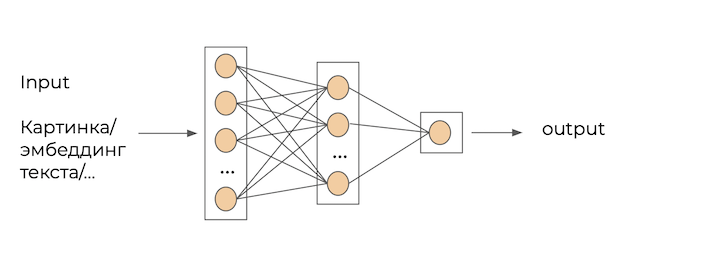



На вход нейросети подается объект, представленный в виде вектора. Этот объект проходит через слои сети и сеть выдает ответ. Когда нейросети подается на вход следующий объект, нейросеть выполняет с ним ***точно такие же преобразования***, что и с предыдущим поданным на вход объектом. Никакой информации от предыдущего объекта в нейросети не сохранилось.

Если мы хотим, чтобы нейросеть читала текст слово за словом, нужно как-то снабдить ее механизмом "памяти".

Рекуррентная нейросеть будет похожа на полносвязную. Но к каждому ее слою добавится еще одна связь — из себя в себя. Это будет "памятью" этого слоя.

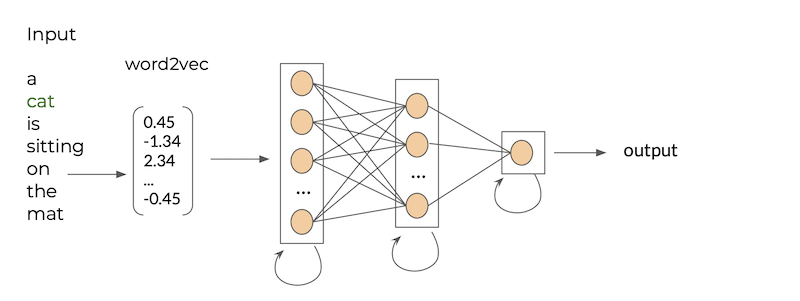

Сейчас мы детально разберем, как устроен слой такой сети и вся сеть. Изобразим обычный полносвязный слой:

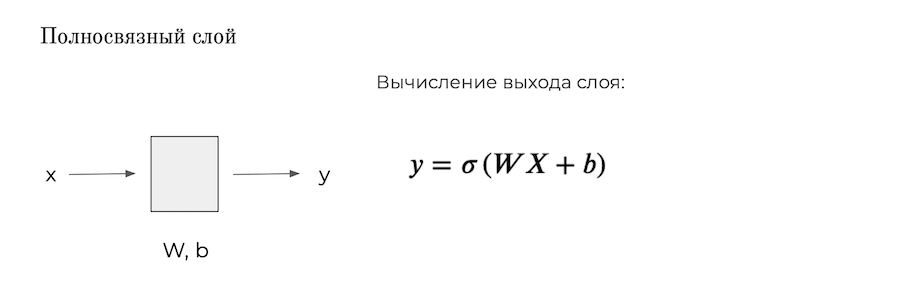

В нем было два обучаемых параметра ($W$ и $b$). В рекуррентном слое будет на три обучаемых параметра больше, и появится новая сущность — вектор скрытого состояния этого слоя. Это будет "памятью" слоя.

Теперь на основе входа $X^T$ будет сначала обновляться вектор скрытого состояния слоя $h^{t-1} -> h^t$, а затем выход слоя будет вычисляться на основе обновленного вектора $h^t$

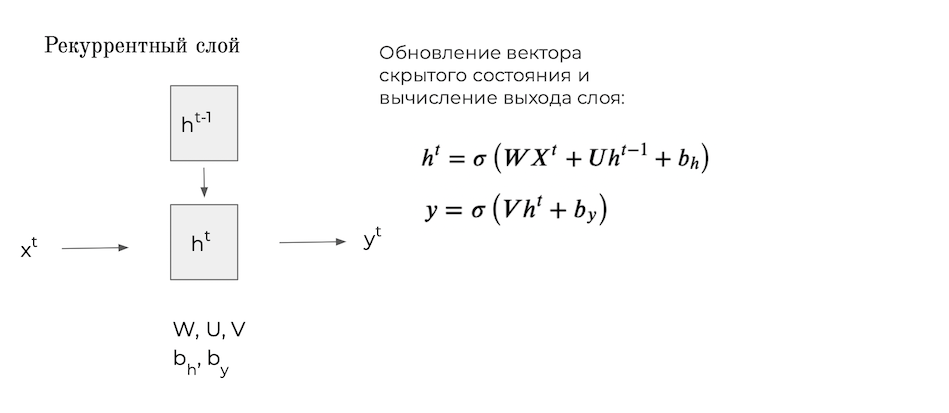

Для наглядности слой полносвязной и рекуррентной неросети можно нарисовать по-другому:

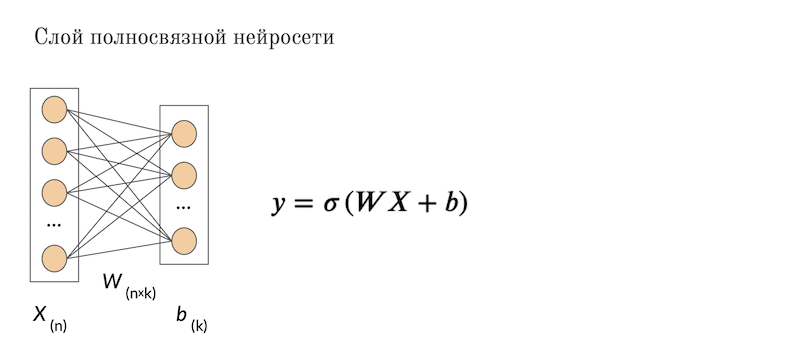

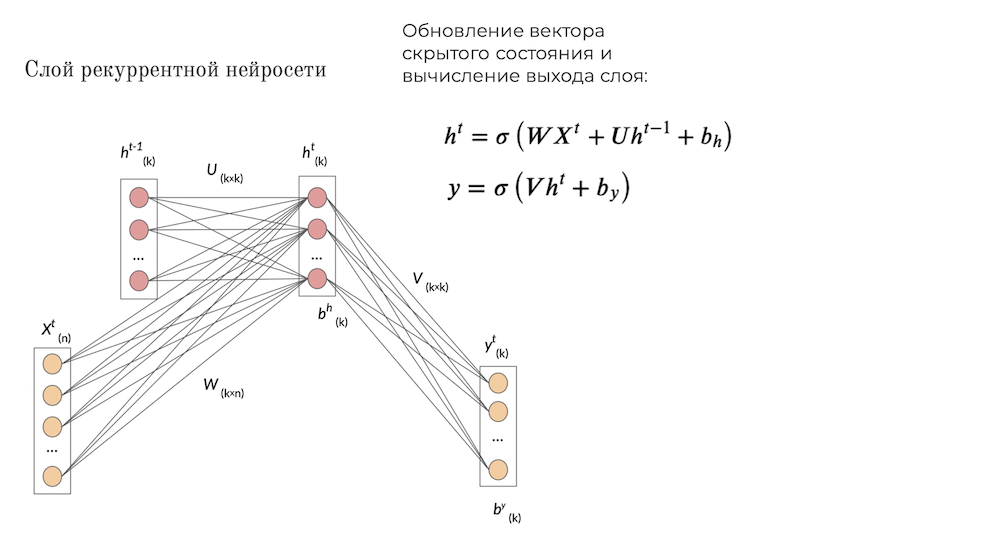

Так происходит forward pass одного рекуррентного слоя. Перейдем в [презентацию](https://docs.google.com/presentation/d/1q97eoaLwdkhlwXMxYYTn6LOgatG6PQ6h7NvkbQak3ig/edit?usp=sharing), чтобы разобрать forward pass рекуррентной нейронной сети с $n$ рекуррентными слоями.

Обучение рекуррентной нейросети происходит также с помощью градиентного спуска. Отличия появляются только в подсчете градиентов параметров. Подробнее об этом можно посмотреть в [лекции](https://www.youtube.com/watch?v=WsXgPD4lmlc) Deep Learning School.

### Слой Embedding

Остался один нюанс: в рекуррентных нейросетях эмбеддинги слов обычно берутся не из word2vec, а выучиваются. Для этого перед рекуррентными слоями добавляется слой эмббединга. Этот слой — матрица размера $n*k$, где $n$ — размер словаря, $k$ — размер эмбеддинга. Слова подаются на вход сети в виде их one-hot векторов. После пропускания через слой embedding one-hot вектор превращается в $i$-ю строку матрицы эмбеддинга, где $i$ — номер слова в словаре.

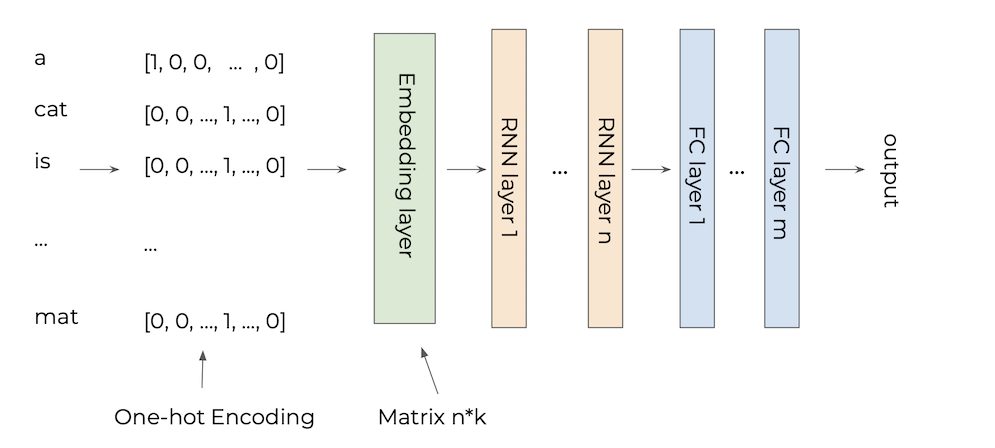

## Задача языкового моделирования

Языковая модель — это модель, которая оценивает вероятности разных токенов:
- слов
- букв
- ...

или вероятности последовательностей токенов:
- предложений
- слов
- ...


Вероятность токена — это то, насколько вероятно, что данный токен появится после заданной последовательности токенов:

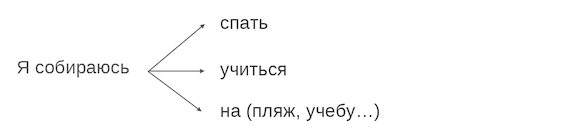

Вероятность предложения — это то, насколько вероятно, что данное предложение встретится в естественном языке

*P(*Я собираюсь на пляж*)* > *P(*Пляж собираюсь на я)

Вы, конечно, встречали языковые модели в жизни:

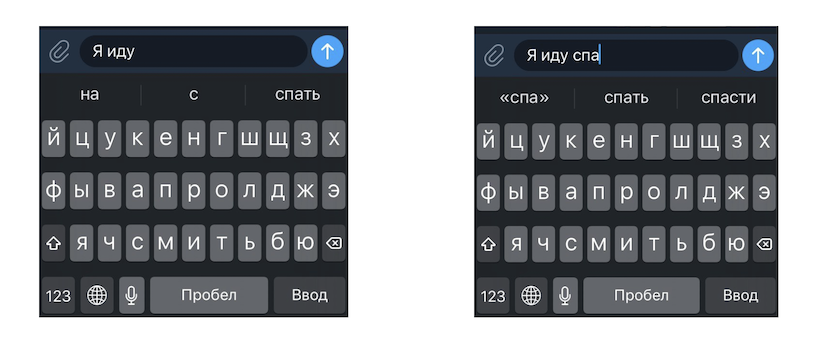

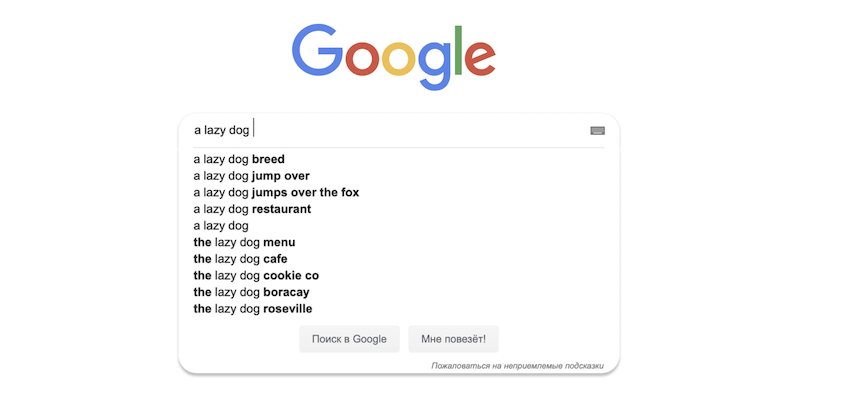

Языковая модель, получается, должна быть устроена как-то так:

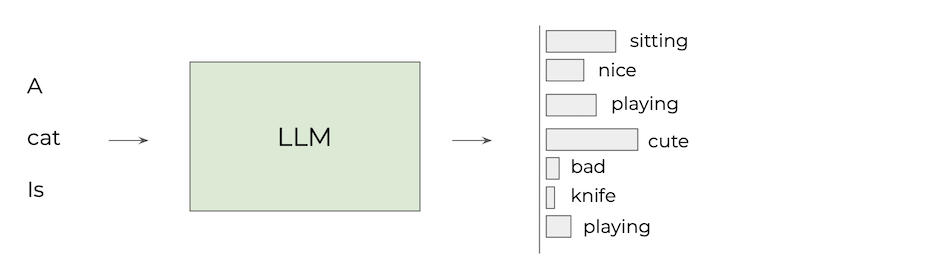

Если LLM тут — обучаемая нейросеть, то становится понятно, как такую нейросеть обучать:
- задача — задача классификации на $n$ классов, где $n$ — размер словаря;
- данные — набор текстов;
- идем по тексту с начала до конца, в каждый момент времени по текущему суффиксу (A cat is) учим LLM предсказывать следующее слово. Правильное слово — то, которое в нашем тексте идет следующим (sitting). Учим на cross-entropy между выданным распределением вероятности и правильным ответом (one-hot вектором слова sitting).

### Генерация текста с помощью языковой модели

Если у нас есть языковая модель, которая умеет оценивать вероятность следующего токена в тексте, то с помощью этой модели становится возможно генерировать новый текст.

Алгоритм тут будет такой:
- подаем на вход LLM начало предложения (A cat is)
- получаем из LLM распределение вероятностей на следующее слово из словря
- выбираем на основе распределения вероятностей следующее слово в тексте (A cat is sitting)
- подаем новое начало предложения на вход LLM (A cat is sitting)
- ...

Сейчас мы применим RNN для решения задачи языкового моделирования.

## RNN для задачи языкового моделирования.
Рассмотрим набор данных, который представляет собой список имен. Каждая последовательность – отдельное имя. В качестве токенов будем рассматривать отдельные символы (буквы). То есть, мы будем учить RNN генерировать имена =)

In [ ]:
import os                                                                         # импортируем часть библиотеки для взаимодействия с данными на
                                                                                  # компьютере и для доступа к окружению, где запущен notebook
from random import sample                                                         # random - часть библиотеки, которая отвечает за случайные числа

import numpy as np                                                                # библиотека для работы с векторами и матрицами

import torch                                                                      # тут все нейронные сети
import torch.nn as nn                                                             # тут все блоки нейронных сетей, слои
import torch.nn.functional as F                                                   # функции, которые нам пригодятся

import matplotlib.pyplot as plt                                                   # для построения графиков
from IPython.display import clear_output                                          # для интерактивного построения графиков
                                                                                  # clear_output позволяет покадрово рисовать график сходимости

Загрузим и предобработаем данные:

In [ ]:
! wget https://raw.githubusercontent.com/MSUcourses/Data-Analysis-with-Python/main/Deep%20Learning/Files/names.txt -O names.txt  # скачиваем names.txt

--2023-11-15 15:02:24--  https://raw.githubusercontent.com/MSUcourses/Data-Analysis-with-Python/main/Deep%20Learning/Files/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55868 (55K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>]  54.56K  --.-KB/s    in 0.004s  

2023-11-15 15:02:24 (13.0 MB/s) - ‘names.txt’ saved [55868/55868]



In [ ]:
start_token = " "                                                                 # технический токен (здесь это пробел), с которого начинается
                                                                                  # каждая последовательность

with open("names.txt") as f:                                                      # открыли файл
    names = f.read()[:-1].split('\n')                                             # names - все, что есть, разделенное по переносу строки
    names = [start_token + line for line in names]                                # к каждому элементу последовательности добавили пробел в начало

In [ ]:
names[:10]

[' Abagael',
 ' Abagail',
 ' Abbe',
 ' Abbey',
 ' Abbi',
 ' Abbie',
 ' Abby',
 ' Abigael',
 ' Abigail',
 ' Abigale']

Как видим, в датасете 7944 примера. Обратите внимание, каждая последовательность начинается с пробела.

In [ ]:
len(names)

7944

Рассмотрим распределение длин последовательностей:

max_length = 16


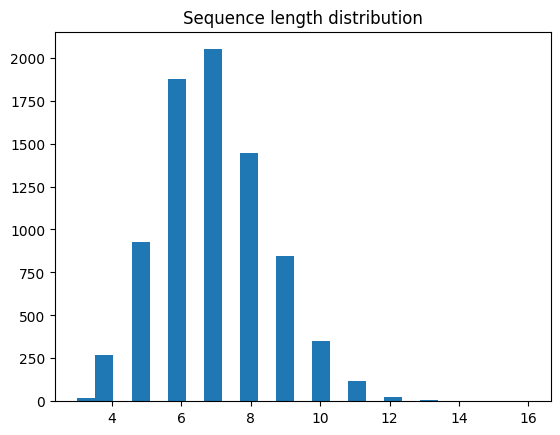

In [ ]:
MAX_LENGTH = max(map(len, names))                                                 # map применяет конкретную функцию к списку или любому итерируемогу объекту
                                                                                  # в данном случае происходит подсчет длины каждого элемента множества names
                                                                                  # и поиск максимума от результата
print("max_length =", MAX_LENGTH)

plt.title('Sequence length distribution')
plt.hist(list(map(len, names)),bins=25);                                          # hist - гистограмма
                                                                                  # считаем количество вхождений именно для списка

#### Предобработка текста

Для начала построим "словарь" из всех уникальных токенов и пронумеруем их. Тогда мы можем кодировать входные данные как последовательность их индексов символов. Например, имя "Aboba" будет представлено как `[0, 1, 15, 1, 0]`.

In [ ]:
set('aaaaaabbbbcc')                                                               # вывод всех уникальных элементов последовательной структуры

{'a', 'b', 'c'}

In [ ]:
tokens = set() # <set of all unique characters in the dataset>

for name in names:                                                                # итерируемся по всем именам
    tokens.update(set(name))                                                      # считаем set от последовательности и обновляем множество,
                                                                                  # добавляя в него все уникальные новые токены из нового имени
tokens = list(tokens)                                                             # оборачиваем все в список

num_tokens = len(tokens)
print ('num_tokens = ', num_tokens)

num_tokens =  55


In [ ]:
# <словарь символ -> его id (index in tokens list)>
token_to_id = {
    token: idx for idx, token in enumerate(tokens)                                # пронумеровали все токены, каждому токену соответствует его
}                                                                                 # порядковый номер

In [ ]:
token_to_id

{'s': 0,
 'C': 1,
 'v': 2,
 'D': 3,
 'w': 4,
 'J': 5,
 'W': 6,
 'k': 7,
 'i': 8,
 ' ': 9,
 'Q': 10,
 't': 11,
 'P': 12,
 'q': 13,
 'x': 14,
 'r': 15,
 'F': 16,
 'z': 17,
 'L': 18,
 'Y': 19,
 'l': 20,
 'f': 21,
 'B': 22,
 'R': 23,
 'U': 24,
 'a': 25,
 'j': 26,
 'X': 27,
 'Z': 28,
 'S': 29,
 'b': 30,
 'm': 31,
 'c': 32,
 'g': 33,
 'u': 34,
 'I': 35,
 'N': 36,
 'T': 37,
 "'": 38,
 'n': 39,
 'G': 40,
 'H': 41,
 'p': 42,
 'M': 43,
 '-': 44,
 'd': 45,
 'O': 46,
 'E': 47,
 'A': 48,
 'e': 49,
 'y': 50,
 'V': 51,
 'K': 52,
 'h': 53,
 'o': 54}

Теперь каждому соответствует уникальный индекс.

Наконец, реализуем функцию для преобразования список имен в матричное представление, которое в дальнейшем будет использоваться в качестве батча.
Т.к. тексты могут быть различной длины, дополним их до максимальной длины `max_len` или до длины самого длинного имени из выборки, если этот параметр не указан.

In [ ]:
def to_matrix(names, max_len=None, pad=token_to_id[' ']):
    """Casts a list of names into rnn-digestable matrix"""

    max_len = max_len or max(map(len, names))                                     # считаем макс длину среди всех имеющихся имен и используем ее
                                                                                  # или макс длину, заданную извне (если такая есть)
    names_ix = np.zeros([len(names), max_len], dtype='int32') + pad                       # матрица размером [количество имен х макс длина] из нулей
                                                                                  # затем заменяем нули на индекс падтокена
                                                                                  # pad - технический токен (в данном случае – пробел), который приводит
                                                                                  # последовательности к одинаковой длине

    for i in range(len(names)):                                                   # итерируемся по всем именам
        line_ix = [token_to_id[c] for c in names[i]]                              # и для каждого элемента имени переводим токен (символ)
                                                                                  # в соответствующий индекс
        names_ix[i, :len(line_ix)] = line_ix                                      # записываем в матрицу новую строку из индексов

    return names_ix

Рассмотрим пример:

In [ ]:
print('\n'.join(names[::1000]))
print(to_matrix(names[::1000], max_len=MAX_LENGTH))

 Abagael
 Claresta
 Glory
 Liliane
 Prissie
 Geeta
 Giovanne
 Piggy
[[ 9 48 30 25 33 25 49 20  9  9  9  9  9  9  9  9]
 [ 9  1 20 25 15 49  0 11 25  9  9  9  9  9  9  9]
 [ 9 40 20 54 15 50  9  9  9  9  9  9  9  9  9  9]
 [ 9 18  8 20  8 25 39 49  9  9  9  9  9  9  9  9]
 [ 9 12 15  8  0  0  8 49  9  9  9  9  9  9  9  9]
 [ 9 40 49 49 11 25  9  9  9  9  9  9  9  9  9  9]
 [ 9 40  8 54  2 25 39 39 49  9  9  9  9  9  9  9]
 [ 9 12  8 33 33 50  9  9  9  9  9  9  9  9  9  9]]


Подсветим все позиции, которые соответствуют пробелам:

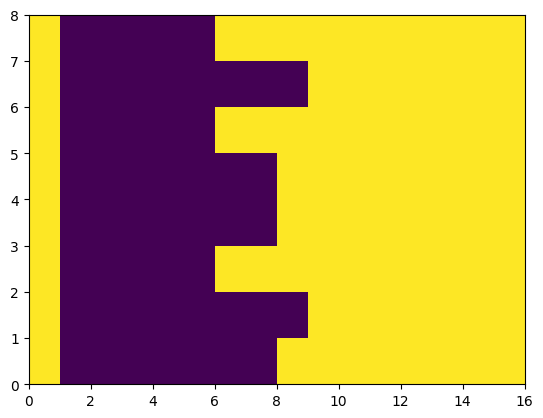

In [ ]:
plt.pcolormesh(to_matrix(names[::1000], max_len=MAX_LENGTH)==token_to_id[' '])

In [ ]:
class CharRNNLoop(nn.Module):
    def __init__(self, num_tokens=num_tokens, emb_size=16, rnn_num_units=64):
        super(self.__class__, self).__init__()
        self.emb = nn.Embedding(num_tokens, emb_size)
        self.rnn = nn.RNN(emb_size, rnn_num_units, batch_first=True)
        self.hid_to_logits = nn.Linear(rnn_num_units, num_tokens)

    def forward(self, x):
        h_seq, _ = self.rnn(self.emb(x))
        next_logits = self.hid_to_logits(h_seq)
        return next_logits

In [ ]:
model = CharRNNLoop()
opt = torch.optim.Adam(model.parameters())
criterion = nn.NLLLoss()

Наконец, проверим, что все работает:

In [ ]:
batch_ix = to_matrix(sample(names, 32), max_len=MAX_LENGTH)
batch_ix = torch.LongTensor(batch_ix)

logits = model(batch_ix)

In [ ]:
logits.shape

torch.Size([32, 16, 55])

Т.к. задача предсказания следующего токена – это задача классификации, в качестве функции потерь будет выступать уже знакомая нам кросс-энтропия.

В качестве "истинных значений" мы будем использовать `batch_ix[:, 1:]` - матрицу из индексов токенов, сдвинутых на один шаг вперед.

batch_ix = _Abigail
logits = Abigail_

batch_ix[1:] logits[:-1]

In [ ]:
predictions_logp = F.log_softmax(logits[:, :-1], dim=-1)                          # все кроме последнего предсказания, т.к. в конце последовательности нам не нужно ничего предсказывать
actual_next_tokens = batch_ix[:, 1:]                                              # наши правильные ответы (все что есть, начиная с 1 шага), исключаем первый шаг, т.к. в начале мы находились в нулевом состоянии и ничего не предсказывали

loss = criterion(                                                                 # считаем функцию ошибки от предсказаний и истинных значений
    predictions_logp.contiguous().view(-1, num_tokens),                           # вытягиваем все в один батч (т.е. из размерности (batch, time, prob) переходим к (batch*time, prob))
    actual_next_tokens.contiguous().view(-1)
)

loss.backward()

#### Обучение модели

Сама процедура обучения практически не отличается от предыдущих. Единственное различие заключается в том, что в этот раз мы семплируем строки переменной длины, а затем приводим их к единой длине внутри одного батча.

In [ ]:
model = CharRNNLoop()
opt = torch.optim.Adam(model.parameters())
criterion = nn.NLLLoss()                                  # используем оптимизатор Adam                                                                     # создали список для истории (записи значений функции потерь)

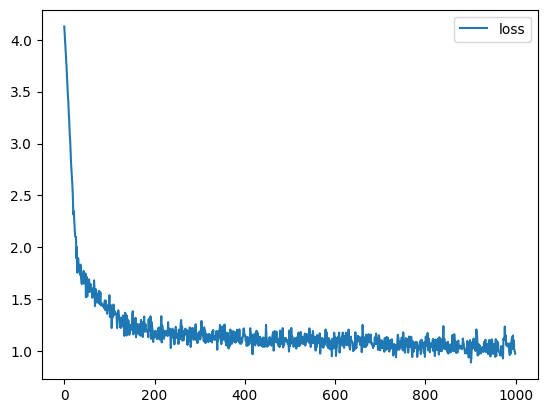

In [ ]:
MAX_LENGTH = 16
history = []

for i in range(1000):                                                             # всего 1000 итераций

    batch_ix = to_matrix(sample(names, 32), max_len=MAX_LENGTH)                   # выбрали 32 случайных элемента из всех имен
    batch_ix = torch.LongTensor(batch_ix)                                         # преобразовали в тензор

    logits = model(batch_ix)                                                    # получили последовательность logp

    # Считаем loss
    predictions_logp = F.log_softmax(logits[:, :-1], dim=-1)
    actual_next_tokens = batch_ix[:, 1:]

    loss = criterion(
        predictions_logp.contiguous().view(-1, num_tokens),
        actual_next_tokens.contiguous().view(-1)
    )

    # Обучение методов backprop
    loss.backward()                                                               # посчитали градиенты
    opt.step()
    opt.zero_grad()                                                                  # сделали шаг

    # код отрисовки графика
    history.append(loss.item())
    if (i+1)%100==0:                                                              # на каждом сотом шаге обновляем график
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."     # проверяем, что среднее значение за последние 10 шагов больше
                                                                                  # среднего значения за первые 10 шагов (если нет – модель не сошлась)

#### Генерация имен
После обучения языковой модели (а обученная нейросеть является языковой моделью) перейдем к генерации данных.
Для этого воспользуемся функцией ниже:

In [ ]:
def generate_sample(model, seed_phrase=' ', max_length=MAX_LENGTH, temperature=1.0):
    '''
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
                        smaller temperature converges to the single most likely output
    '''

    x_sequence = [token_to_id[token] for token in seed_phrase]                    # преобразуем seed_phrase в последовательность индексов токенов
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)

    #start generating
    for _ in range(max_length - len(seed_phrase)):
        logits = model(x_sequence)                                                # новое скрытое состояние и логит для след токена - это
                                                                                  # последний элемент последовательности и текущее скрытое состояние
        p_next = F.softmax(logits / temperature, dim=-1).data.numpy()[0][-1]      # считаем вероятность: softmax от текущих логитов
                                                                                  # temperature отвечает за случайность (гиперпараметр)

        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(num_tokens,p=p_next)                           # из всех токенов с распределением p_next
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)                      # добавляем к последовательности

    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])             # возвращаем все, сконкатенировав через пустую строку

Рассмотрим несколько случайных примеров:

In [ ]:
for _ in range(10):
    print(generate_sample(model, temperature=1.))

 Sustina        
 Ra             
 Lorisita       
 Marn           
 Erey           
 Eeniel      d  
 Ideyna         
 Jey            
 Cudmol         
 Roethry        


Также мы можем задать некоторую подстроку для инициализации начального состояния нашей модели.

In [ ]:
for _ in range(50):
    print(generate_sample(model, seed_phrase=' Serg', temperature=1.))

 Serga          
 Serg           
 Sergio         
 Sergancele     
 Sergoe         
 Sergada        
 Sergeabto      
 Sergea         
 Serge          
 Sergira        
 Sergeela       
 Sergeestla     
 Sergeele       
 Sergaa         
 Sergy          
 Sergene        
 Serge          
 Serg           
 Sergistho      
 Sergise        
 Sergile        
 Sergy          
 Sergenn        
 Serghie        
 Serglan        
 Sergon         
 Sergero        
 Sergorle       
 Serger         
 Sergan         
 Sergene        
 Sergetolly     
 Serga          
 Sergins        
 Sergelveianna  
 Sergis         
 Sergero        
 Serga          
 Sergan         
 Sergiy         
 Sergost        
 Sergtte        
 Sergsia        
 Sergisha       
 Sergle         
 Sergale        
 Serga          
 Serge          
 Sergaru        
 Sergine        


## Дополнительные материалы

- Лекции Deep Learning School по RNN:
    - [Рекуррентная нейронная сеть](https://youtu.be/3OljkWQ2Uc0?feature=shared);
    - [Обучение RNN](https://youtu.be/WsXgPD4lmlc?feature=shared);
    - [Функции активации RNN](https://youtu.be/OF_JnQlHXQ4?feature=shared);
    - [Семинар по RNN](https://youtu.be/_wpAkWZmlyg?feature=shared).
- Лекции Deep Learning School по языковому моделированию:
    - старое, веду я:
        - [Языковое моделирование. Частотный подход](https://youtu.be/aS2A7b-4uT4?feature=shared);
        - [Языковое моделирование. Нейронные сети](https://youtu.be/-tK7WcE5Wfo?feature=shared);
    - новое, веду не я:
        - [Языковое моделирование. Постановка задачи](https://youtu.be/DHuRg6iO6FU?feature=shared);
        - [Языковое моделирование. N-грамные модели](https://youtu.be/iszyO98wobw?feature=shared);
        - [Рекуррентные языковые модели](https://youtu.be/nyzJA3lUx1c?feature=shared);
        - [Генерация текста с помощью языковых моделей](https://youtu.be/iR7p5FCeE4M?feature=shared);
        - [Семинар. Языковое моделирование.](https://youtu.be/SzbdlJ0wBCo?feature=shared)
